# Train_Test_IoT_Weather Dataset

# Naive Bayes

In [95]:
columns_to_drop = ["ts", "date", "time", "type"]
df1 = df1.drop(columns_to_drop, axis=1)


In [96]:
X = df1.drop('label', axis=1)
y = df1['label']


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}



In [99]:
model = GaussianNB()

In [100]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [101]:
best_model.fit(X_train, y_train)


GaussianNB()

In [102]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [104]:
tn, fp, fn, tp = conf_matrix.ravel()
tnr = tn / (tn + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
fer = fn / (fn + tn)

In [105]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [106]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
print("Matthews Correlation Coefficient:", mcc)
print("True Negative Rate (TNR):", tnr)
print("Negative Predictive Value (NPV):", npv)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("False Discovery Rate (FDR):", fdr)
print("False Emission Rate (FER):", fer)
print("AUC Score:", auc_score)

Confusion Matrix:
 [[6549  502]
 [2925 1876]]
Accuracy: 0.7108504893688828
Precision: 0.7888982338099243
Recall: 0.39075192668194125
F1-Score: 0.52263546454938
Matthews Correlation Coefficient: 0.39171125395460854
True Negative Rate (TNR): 0.9288044249042688
Negative Predictive Value (NPV): 0.6912602913236225
False Positive Rate (FPR): [0.         0.         0.         ... 0.99560346 0.99560346 1.        ]
False Negative Rate (FNR): 0.6092480733180587
False Discovery Rate (FDR): 0.2111017661900757
False Emission Rate (FER): 0.30873970867637746
AUC Score: 0.781302210032769


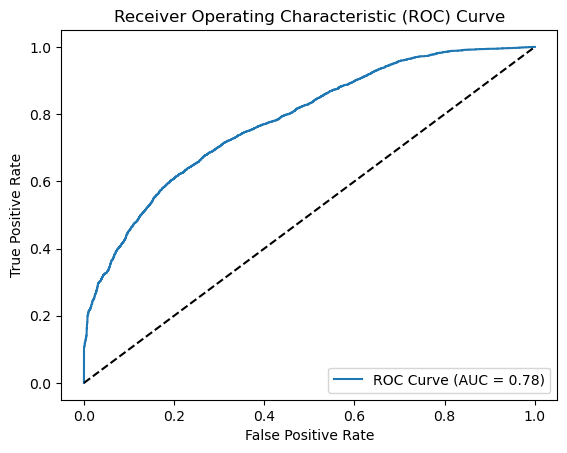

In [107]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Using logistic regression

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, matthews_corrcoef


In [109]:
df = pd.read_csv('Train_Test_IoT_Weather.csv')
df

,ts,date,time,temperature,pressure,humidity,label,type
0,1556238796,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,1556238796,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,1556238796,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,1556238801,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,1556238801,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos
...,...,...,...,...,...,...,...,...
59255,1554166618,1-Apr-19,17:56:58,32.799434,2.204924,37.024913,0,normal
59256,1554166618,1-Apr-19,17:56:58,29.453781,-2.030547,90.297894,0,normal
59257,1554166619,1-Apr-19,17:56:59,47.185992,0.872942,37.687701,0,normal
59258,1554166623,1-Apr-19,17:57:03,43.097037,3.168207,93.647950,0,normal


In [110]:
columns_to_drop = ["ts", "date", "time", "type"]
df = df.drop(columns_to_drop, axis=1)

In [111]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [112]:
print(df.head())

   temperature  pressure   humidity  label
0    40.881866 -0.101806  38.363631      1
1    44.913806  2.661616  46.141423      1
2    38.295822 -2.438871  50.850643      1
3    41.306586 -0.101806  38.363631      1
4    44.903178  3.080849  46.141423      1


In [113]:
X = df.drop('label', axis=1) 
y = df['label']  

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [116]:


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [118]:
tn, fp, fn, tp = conf_matrix.ravel()
tnr = tn / (tn + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
fer = fn / (fn + tn)

In [119]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [120]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
print("Matthews Correlation Coefficient:", mcc)
print("True Negative Rate (TNR):", tnr)
print("Negative Predictive Value (NPV):", npv)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("False Discovery Rate (FDR):", fdr)
print("False Emission Rate (FER):", fer)
print("AUC Score:", auc_score)

Confusion Matrix:
 [[6549  502]
 [2925 1876]]
Accuracy: 0.7108504893688828
Precision: 0.7888982338099243
Recall: 0.39075192668194125
F1-Score: 0.52263546454938
Matthews Correlation Coefficient: 0.39171125395460854
True Negative Rate (TNR): 0.9288044249042688
Negative Predictive Value (NPV): 0.6912602913236225
False Positive Rate (FPR): [0. 0. 0. ... 1. 1. 1.]
False Negative Rate (FNR): 0.6092480733180587
False Discovery Rate (FDR): 0.2111017661900757
False Emission Rate (FER): 0.30873970867637746
AUC Score: 0.5564414778973238


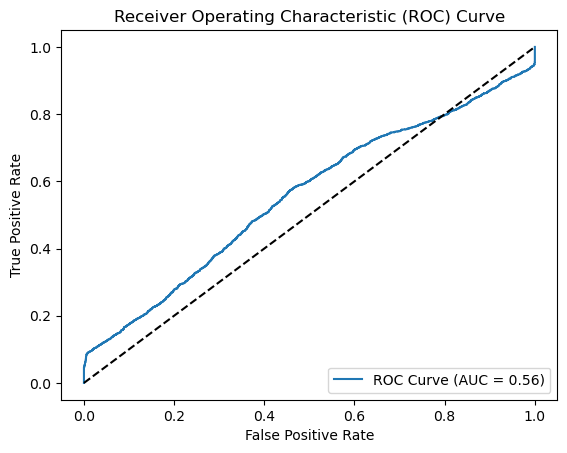

In [121]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# KNN

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [124]:
df3 = pd.read_csv('Train_Test_IoT_Weather.csv')
df3

,ts,date,time,temperature,pressure,humidity,label,type
0,1556238796,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,1556238796,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,1556238796,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,1556238801,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,1556238801,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos
...,...,...,...,...,...,...,...,...
59255,1554166618,1-Apr-19,17:56:58,32.799434,2.204924,37.024913,0,normal
59256,1554166618,1-Apr-19,17:56:58,29.453781,-2.030547,90.297894,0,normal
59257,1554166619,1-Apr-19,17:56:59,47.185992,0.872942,37.687701,0,normal
59258,1554166623,1-Apr-19,17:57:03,43.097037,3.168207,93.647950,0,normal


In [125]:
columns_to_drop = ["ts", "date", "time", "type"]
df3= df3.drop(columns_to_drop, axis = 1)

In [126]:
X= df3.drop('label', axis =1)
Y = df3['label']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}


In [141]:
model = KNeighborsClassifier()

In [142]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [143]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [144]:
tn, fp, fn, tp = conf_matrix.ravel()
tnr = tn / (tn + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
fer = fn / (fn + tn)


In [145]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)


In [147]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)
print("Matthews Correlation Coefficient:", mcc)
print("True Negative Rate (TNR):", tnr)
print("Negative Predictive Value (NPV):", npv)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("False Discovery Rate (FDR):", fdr)
print("False Emission Rate (FER):", fer)
print("AUC Score:", auc_score)


Confusion Matrix:
 [[6743  218]
 [ 217 4674]]
Accuracy: 0.9632973337833277
Precision: 0.955437448896157
Recall: 0.9556327949294623
F1-Score: 0.9555351119288562
Matthews Correlation Coefficient: 0.9242873712950278
True Negative Rate (TNR): 0.9686826605372791
Negative Predictive Value (NPV): 0.9688218390804598
False Positive Rate (FPR): [0.         0.00962505 0.00962505 0.00962505 0.00962505 0.00962505
 0.00962505 0.00976871 0.00976871 0.00991237 0.00991237 0.01005603
 0.01005603 0.01019968 0.01019968 0.01034334 0.01034334 0.01034334
 0.01034334 0.010487   0.010487   0.01063066 0.01063066 0.01077431
 0.01077431 0.01091797 0.01091797 0.01106163 0.01106163 0.01134894
 0.01134894 0.01163626 0.01163626 0.01177992 0.01177992 0.01192357
 0.01192357 0.01206723 0.01206723 0.01221089 0.01221089 0.01235455
 0.01235455 0.0124982  0.0124982  0.01292918 0.01292918 0.01307283
 0.01307283 0.01336015 0.01336015 0.01364746 0.01364746 0.01393478
 0.01393478 0.01422209 0.01422209 0.01436575 0.01436575 0.01

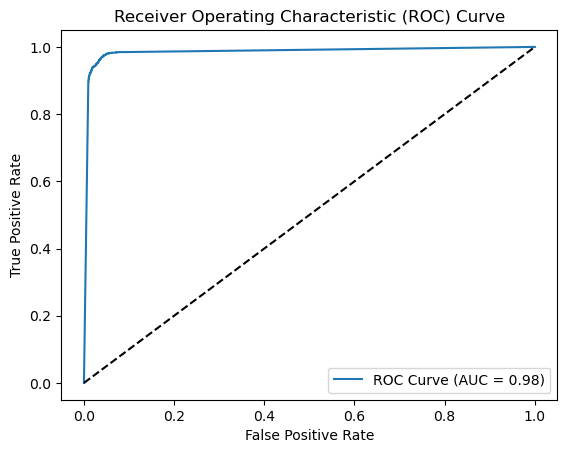

In [148]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()